In [2]:
# Add the Pandas dependency.
import pandas as pd

# Import Matplotlib
import matplotlib.pyplot as plt

# Import the NumPy module.
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Import CityPy
from citipy import citipy

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0883204649e3db8f0515471245140af2


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | kavaratti
Processing Record 6 of Set 1 | nyurba
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | haines junction
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 15 of Set 1 | takoradi
Processing Record 16 of Set 1 | tartagal
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | hudson bay
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | nome
Processing Record 21 of Set 1 | samusu
City not found. Skipping...
Processing Record 22 of Se

Processing Record 32 of Set 4 | chuy
Processing Record 33 of Set 4 | pachino
Processing Record 34 of Set 4 | sorland
Processing Record 35 of Set 4 | richards bay
Processing Record 36 of Set 4 | shimoda
Processing Record 37 of Set 4 | comendador
Processing Record 38 of Set 4 | tingi
Processing Record 39 of Set 4 | la ronge
Processing Record 40 of Set 4 | yazoo city
Processing Record 41 of Set 4 | klaksvik
Processing Record 42 of Set 4 | kodino
Processing Record 43 of Set 4 | necochea
Processing Record 44 of Set 4 | sao joao da barra
Processing Record 45 of Set 4 | bacuit
City not found. Skipping...
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | motygino
Processing Record 48 of Set 4 | tanout
Processing Record 49 of Set 4 | buqayq
City not found. Skipping...
Processing Record 50 of Set 4 | seminole
Processing Record 1 of Set 5 | saint george
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | javanrud
Processing Record 4 of Set 5 | tili

Processing Record 24 of Set 8 | tokur
Processing Record 25 of Set 8 | mount isa
Processing Record 26 of Set 8 | san quintin
Processing Record 27 of Set 8 | luanda
Processing Record 28 of Set 8 | wajid
Processing Record 29 of Set 8 | sao gabriel da cachoeira
Processing Record 30 of Set 8 | cidreira
Processing Record 31 of Set 8 | mehamn
Processing Record 32 of Set 8 | mayumba
Processing Record 33 of Set 8 | santa fe
Processing Record 34 of Set 8 | charlottetown
Processing Record 35 of Set 8 | okhotsk
Processing Record 36 of Set 8 | chifeng
Processing Record 37 of Set 8 | galgani
City not found. Skipping...
Processing Record 38 of Set 8 | tiksi
Processing Record 39 of Set 8 | ancud
Processing Record 40 of Set 8 | portland
Processing Record 41 of Set 8 | miyako
Processing Record 42 of Set 8 | etaples
Processing Record 43 of Set 8 | aksarka
Processing Record 44 of Set 8 | pavilosta
Processing Record 45 of Set 8 | apiai
Processing Record 46 of Set 8 | naze
Processing Record 47 of Set 8 | so

Processing Record 15 of Set 12 | amuntai
Processing Record 16 of Set 12 | pjanici
Processing Record 17 of Set 12 | araguatins
City not found. Skipping...
Processing Record 18 of Set 12 | berezovyy
Processing Record 19 of Set 12 | yar-sale
Processing Record 20 of Set 12 | college
Processing Record 21 of Set 12 | kieta
Processing Record 22 of Set 12 | imeni morozova
Processing Record 23 of Set 12 | ler
Processing Record 24 of Set 12 | kerteh
City not found. Skipping...
Processing Record 25 of Set 12 | tabou
Processing Record 26 of Set 12 | snasa
Processing Record 27 of Set 12 | ziyamet
City not found. Skipping...
Processing Record 28 of Set 12 | ayagoz
Processing Record 29 of Set 12 | russell
Processing Record 30 of Set 12 | kodinsk
Processing Record 31 of Set 12 | marquette
Processing Record 32 of Set 12 | yulara
Processing Record 33 of Set 12 | trunovskoye
Processing Record 34 of Set 12 | tucuman
Processing Record 35 of Set 12 | grand centre
City not found. Skipping...
Processing Recor

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,59.94,68,31,27.85,PT,2022-05-15 00:21:40
1,Busselton,-33.6500,115.3333,58.73,67,100,4.76,AU,2022-05-15 00:21:41
2,Qaanaaq,77.4840,-69.3632,15.26,76,74,4.61,GL,2022-05-15 00:21:42
3,Hermanus,-34.4187,19.2345,56.21,79,8,7.92,ZA,2022-05-15 00:21:42
4,Kavaratti,10.5669,72.6420,80.89,82,100,21.56,IN,2022-05-15 00:21:43
5,Nyurba,63.2842,118.3319,41.31,55,92,1.97,RU,2022-05-15 00:21:44
6,Albany,42.6001,-73.9662,74.05,72,98,4.25,US,2022-05-15 00:18:00
7,Ushuaia,-54.8000,-68.3000,40.66,81,20,11.50,AR,2022-05-15 00:19:38
8,New Norfolk,-42.7826,147.0587,62.92,63,36,5.01,AU,2022-05-15 00:21:44
9,Kapaa,22.0752,-159.3190,82.38,73,20,13.80,US,2022-05-15 00:21:45


In [16]:
# Reorder the columns 
new_order = ["City", "Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df.reindex(columns=new_order)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2022-05-15 00:21:40,38.5167,-28.7000,59.94,68,31,27.85
1,Busselton,AU,2022-05-15 00:21:41,-33.6500,115.3333,58.73,67,100,4.76
2,Qaanaaq,GL,2022-05-15 00:21:42,77.4840,-69.3632,15.26,76,74,4.61
3,Hermanus,ZA,2022-05-15 00:21:42,-34.4187,19.2345,56.21,79,8,7.92
4,Kavaratti,IN,2022-05-15 00:21:43,10.5669,72.6420,80.89,82,100,21.56
5,Nyurba,RU,2022-05-15 00:21:44,63.2842,118.3319,41.31,55,92,1.97
6,Albany,US,2022-05-15 00:18:00,42.6001,-73.9662,74.05,72,98,4.25
7,Ushuaia,AR,2022-05-15 00:19:38,-54.8000,-68.3000,40.66,81,20,11.50
8,New Norfolk,AU,2022-05-15 00:21:44,-42.7826,147.0587,62.92,63,36,5.01
9,Kapaa,US,2022-05-15 00:21:45,22.0752,-159.3190,82.38,73,20,13.80


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

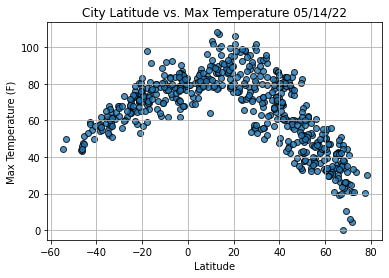

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

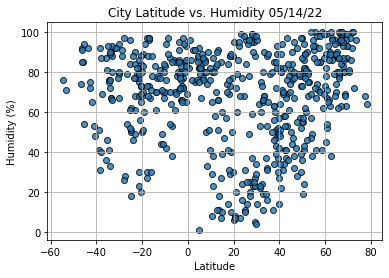

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

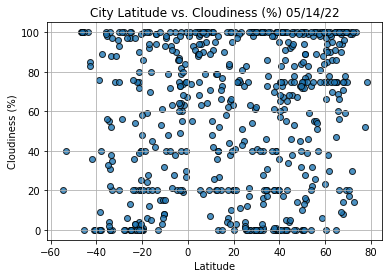

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


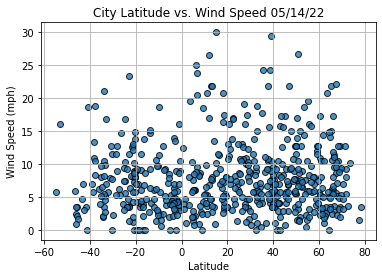

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

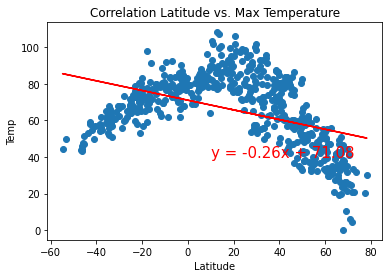

In [37]:
# Temperature

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("Correlation Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

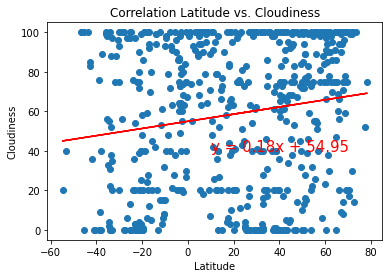

In [40]:
# Cloudiness

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, cloudiness)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,cloudiness)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("Correlation Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

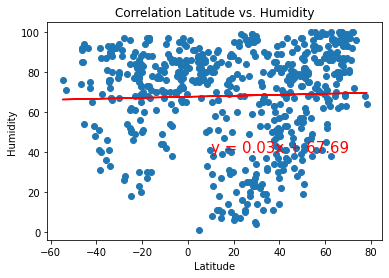

In [39]:
# Humidity

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, humidity)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,humidity)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("Correlation Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

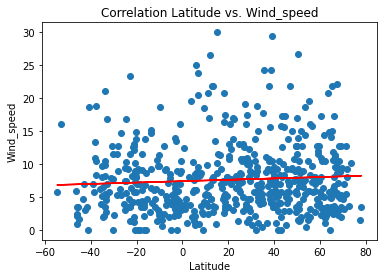

In [43]:
# Wind_speed

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, wind_speed)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,wind_speed)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("Correlation Latitude vs. Wind_speed")
plt.xlabel('Latitude')
plt.ylabel('Wind_speed')
plt.show()

In [45]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


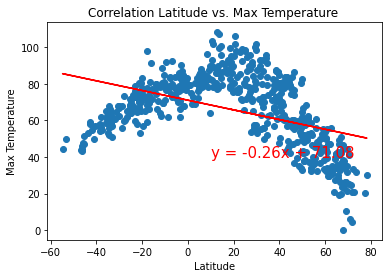

In [46]:
# Call the function

plot_linear_regression(lats, max_temps, 'Correlation Latitude vs. Max Temperature ', 'Max Temperature', (10,40))

In [49]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,TH,2022-05-14 17:41:04,18.5262,98.9394,82.60,73,38,3.22
1,RU,2022-05-14 17:41:05,50.6789,156.1250,37.96,94,100,26.64
2,US,2022-05-14 17:40:01,42.0970,-79.2353,77.95,58,75,10.36
3,CN,2022-05-14 17:41:06,38.4167,77.2406,72.72,43,73,15.61
8,CA,2022-05-14 17:41:09,65.2820,-126.8329,35.64,80,75,21.85


In [59]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


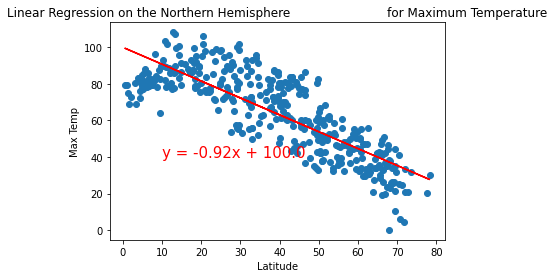

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [61]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.92x + 100.0
The p-value is: 0.000


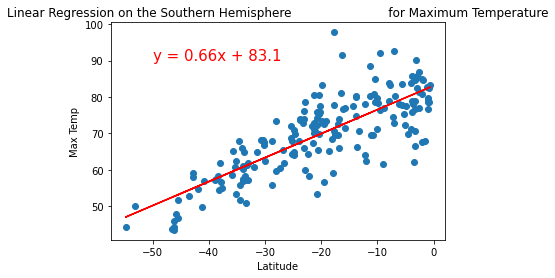

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [63]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = 0.66x + 83.1
The p-value is: 0.000


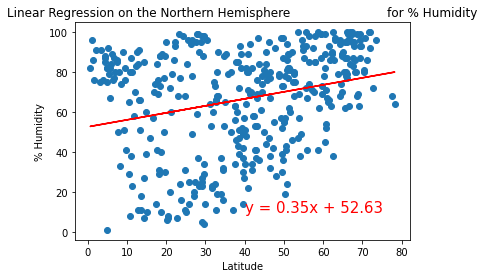

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

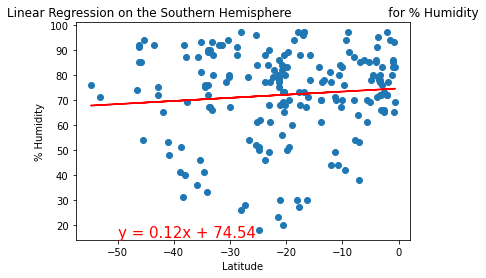

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

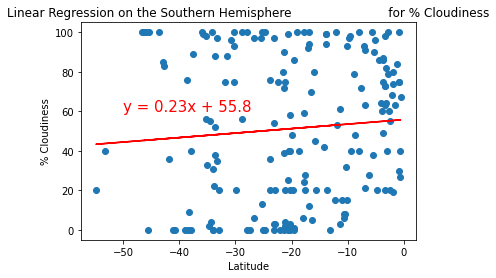

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


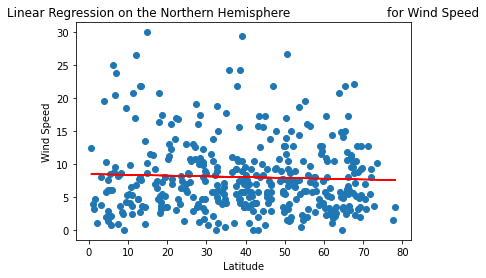

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


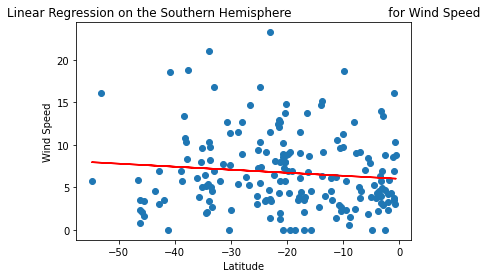

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [69]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.04x + 6.01
The p-value is: 0.153
